In [1]:
import torch
import os
from torch import tensor
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# eval reg
eval_reg_dict = {'sg-gp-0_run1': [0.003419135697185993, 0.0033648021053522825, 0.002980790799483657, 0.0029983208514750004, 0.0029040812514722347], 'sg-gp-0_run2': [0.0032946066930890083, 0.0031374164391309023, 0.0028855286072939634, 0.00277165649458766, 0.002800622256472707], 'sg-gp-0_run3': [0.0035003020893782377, 0.003553675953298807, 0.0033992882817983627, 0.0030832672491669655, 0.003087488003075123], 'sg-gp-1e-2_run1': [0.0024159327149391174, 0.0022131900768727064, 0.0020361386705189943, 0.0019236570224165916, 0.0019148692954331636], 'sg-gp-1e-2_run2': [0.002538957865908742, 0.002370979869738221, 0.00214185519143939, 0.001930977450683713, 0.0019152038730680943], 'sg-gp-1e-2_run3': [0.0026485261041671038, 0.0022389437071979046, 0.00209100847132504, 0.0019989381544291973, 0.002033272758126259]}
loss_alpha_dict = {'sg-gp-0_run1': [0.053633566945791245, 0.06619103997945786, 0.07193471491336823, 0.07398846745491028, 0.07458848506212234], 'sg-gp-0_run2': [0.05574514716863632, 0.06645434349775314, 0.07180549204349518, 0.07429929822683334, 0.07511227577924728], 'sg-gp-0_run3': [0.05506762117147446, 0.06527018547058105, 0.07305511087179184, 0.07548914849758148, 0.07578888535499573], 'sg-gp-1e-2_run1': [0.039014462381601334, 0.055610291659832, 0.06315119564533234, 0.08083952963352203, 0.08077826350927353], 'sg-gp-1e-2_run2': [0.039832502603530884, 0.058449629694223404, 0.0806896761059761, 0.08110859245061874, 0.08120736479759216], 'sg-gp-1e-2_run3': [0.038911767303943634, 0.05483085289597511, 0.08112374693155289, 0.08073079586029053, 0.08031139522790909]}
trace_dict = {'sg-gp-0_run1': [tensor(0.6278, device='cuda:0'), tensor(0.7346, device='cuda:0'), tensor(0.7648, device='cuda:0'), tensor(0.7774, device='cuda:0'), tensor(0.7818, device='cuda:0')], 'sg-gp-0_run2': [tensor(0.6364, device='cuda:0'), tensor(0.7418, device='cuda:0'), tensor(0.7792, device='cuda:0'), tensor(0.7952, device='cuda:0'), tensor(0.7983, device='cuda:0')], 'sg-gp-0_run3': [tensor(0.6288, device='cuda:0'), tensor(0.7315, device='cuda:0'), tensor(0.7645, device='cuda:0'), tensor(0.7813, device='cuda:0'), tensor(0.7875, device='cuda:0')], 'sg-gp-1e-2_run1': [tensor(0.0076, device='cuda:0'), tensor(0.0038, device='cuda:0'), tensor(0.0027, device='cuda:0'), tensor(0.0019, device='cuda:0'), tensor(0.0016, device='cuda:0')], 'sg-gp-1e-2_run2': [tensor(0.0081, device='cuda:0'), tensor(0.0036, device='cuda:0'), tensor(0.0024, device='cuda:0'), tensor(0.0018, device='cuda:0'), tensor(0.0016, device='cuda:0')], 'sg-gp-1e-2_run3': [tensor(0.0084, device='cuda:0'), tensor(0.0040, device='cuda:0'), tensor(0.0025, device='cuda:0'), tensor(0.0018, device='cuda:0'), tensor(0.0017, device='cuda:0')]}

In [3]:
def plot(A,B, name, savefile):
    plt.figure(figsize = (4,3.5))
    A_mean = A.mean(axis = 0)
    B_mean = B.mean(axis = 0)
    A_std = A.std(axis = 0)/np.sqrt(len(A))
    B_std = B.std(axis = 0)/np.sqrt(len(B))
    
    col = '#1f77b4'
    col2 = '#ff7f0e'
   
    
    epoch = [i*10 for i in range(1,6)]
    plt.plot(epoch, A_mean, marker = 'o')
    plt.fill_between(epoch, A_mean -A_std, A_mean + A_std, alpha = 0.15, color = col)
    plt.plot(epoch, B_mean, marker = 'x')
    plt.fill_between(epoch, B_mean -B_std, B_mean + B_std, alpha = 0.15, color = col2)
    plt.legend(['No gradient\npenalty', 'Gradient penalty'], fontsize=12, frameon=False)
    plt.xlabel('Epoch')
    plt.ylabel(name)
    
    destination = os.path.join('./figures', savefile)
    plt.savefig(destination, dpi = 150, bbox_inches="tight")
    plt.show()
    

In [4]:
def plot2(A,B, name, savefile):
    plt.figure(figsize = (4,3.5))
    A_mean = A.mean(axis = 0)
    B_mean = B.mean(axis = 0)
    A_std = A.std(axis = 0)/np.sqrt(len(A))
    B_std = B.std(axis = 0)/np.sqrt(len(B))
    
    col = '#1f77b4'
    col2 = '#ff7f0e'
   
    
    epoch = [i*10 for i in range(1,6)]
    plt.plot(epoch, A_mean, marker = 'o')
    plt.fill_between(epoch, A_mean -A_std, A_mean + A_std, alpha = 0.15, color = col)
    plt.plot(epoch, B_mean, marker = 'x')
    plt.fill_between(epoch, B_mean -B_std, B_mean + B_std, alpha = 0.15, color = col2)
    plt.legend(['No gradient\npenalty', 'Gradient penalty'], fontsize=12, frameon=False)
    plt.xlabel('Epoch')
    plt.ylabel(name)
    plt.hlines(y=0.0807, xmin=10, xmax=50, color='k', linestyle='--')
    
    destination = os.path.join('./figures', savefile)
    plt.savefig(destination, dpi = 150, bbox_inches="tight")
    plt.show()
    

In [5]:
def get_array(eval_dict, name):
    array = []
    for i in range(1,4):
        filename = name + '_run' + str(i)
        array.append(torch.tensor(eval_dict[filename]))
    return np.stack(array)
        

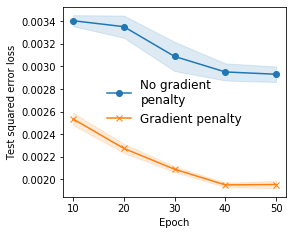

In [6]:
eval_loss_gp0 = get_array(eval_reg_dict, 'sg-gp-0')
eval_loss_gp2 = get_array(eval_reg_dict, 'sg-gp-1e-2' )

plot(eval_loss_gp0, eval_loss_gp2, 'Test squared error loss', 'syn_param_loss')

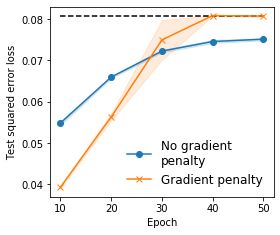

In [7]:
alpha_loss_gp0 = get_array(loss_alpha_dict, 'sg-gp-0')
alpha_loss_gp2 = get_array(loss_alpha_dict, 'sg-gp-1e-2' )

plot2(alpha_loss_gp0, alpha_loss_gp2, 'Test squared error loss', 'syn_alpha_loss')